In [1]:
import requests
import twitter
import json
import pandas as pd
import plotly 
# def oauth_login is learned from <<Mining the Social Web, 3rd>>


def oauth_login():
    CONSUMER_KEY = '7a1pq6oCaqGBjp7xoSJ9Hxy3r'
    CONSUMER_SECRET = 'YyDmo9nYgdQ5YeK8zOhfAXsaIoDrU08xAOxzt7vBuUNVMnDldY'
    OAUTH_TOKEN = '1096083516071260162-vFP8ZA9TvVCxlG0haeIyNelOiXt8Zb'
    OAUTH_TOKEN_SECRET = 'Mvkzy8CE8bDKlltZVvqnUhOKvwqDbysdfXlNiKxWui4zQ'
    auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
    twitter_api = twitter.Twitter(auth=auth)
    return twitter_api
twitter_api = oauth_login()

#name_list = ['Donald Trump']
name_candidate = input("Enter a candidate's name:")
def candidate_now(name_candidate):
    name_list= ['Donald Trump','COVID-19','coronavirus']
    for key_word in name_list:
        count = 100
        search_results = twitter_api.search.tweets(q=key_word, count=count, geocode='40.712776,-74.005974,20mi')['statuses']
    # statuses stand for tweets in Twitter. We only filter tweets not the metadata, so by referring ['statuses']。
    # we didn't save the unwanted data.
        if key_word == name_candidate :
            print('Data for %s: ' %name_candidate)
            tweets1 = [(r['text'], r['created_at']) for r in search_results]
            texts1 = [(r['text']) for r in search_results]
            Total_n1 = len(texts1)# the total number of tweets about Trump  
    return tweets1, texts1, Total_n1

def sentimentAnalysis1(texts1):
    url = 'http://text-processing.com/api/sentiment/'
    positive1 = 0
    negative1 = 0
    neutral1 = 0
    for line in texts1:
        options = {'text': line}
        response = requests.post(url, data=options)
        sentiment = response.json()
        if sentiment['label'] == 'neg':
            negative1 += 1
        elif sentiment['label'] == 'neutral':
            neutral1 += 1
        elif sentiment['label'] == 'pos':
            positive1 += 1
    return [positive1, neutral1, negative1]


tweets1, texts1, Total_n1 = candidate_now(name_candidate)
for i, t in enumerate(tweets1):
    try:
        print(i, t)
    except:
        pass 
positive1, neutral1, negative1 = sentimentAnalysis1(texts1)

Enter a candidate's name:Donald Trump
Data for Donald Trump: 
0 ('RT @JLCauvin: DONALD TRUMP IS BETTER THAN LINCOLN.😂😂\nGet the new (#1) Trump album Fireside Craps: The Deuce on iTunes and Amazon https://t.…', 'Mon May 04 18:35:39 +0000 2020')
1 ('RT @NYUforJoe: Thanks, @IndivisibleTeam!!! We stand together, united, with our eyes on the prize: sending Donald Trump packing in November.…', 'Mon May 04 18:35:35 +0000 2020')
2 ('RT @JLCauvin: DONALD TRUMP IS BETTER THAN LINCOLN.😂😂\nGet the new (#1) Trump album Fireside Craps: The Deuce on iTunes and Amazon https://t.…', 'Mon May 04 18:35:18 +0000 2020')
3 ('Why are laws often seen in direct contrast to scientific research? “The Republican party has been on an aggressive… https://t.co/lbNplu8n8B', 'Mon May 04 18:35:02 +0000 2020')
4 ('RT @JLCauvin: DONALD TRUMP IS BETTER THAN LINCOLN.😂😂\nGet the new (#1) Trump album Fireside Craps: The Deuce on iTunes and Amazon https://t.…', 'Mon May 04 18:35:02 +0000 2020')
5 ("RT @joelockhart: All of May

In [2]:
def candidate_lastweek(name_candidate):
    name_list= ['Donald Trump','COVID-19','coronavirus']
    for key_word in name_list:
        count = 100
        #only could get a week ago data
        search_results = twitter_api.search.tweets(q=key_word, count=count, geocode='40.712776,-74.005974,20mi', since='2020-04-27', until='2020-04-28')['statuses']
    # statuses stand for tweets in Twitter. We only filter tweets not the metadata, so by referring ['statuses']。
    # we didn't save the unwanted data.
        if key_word == name_candidate :
            print('Data for %s: ' %name_candidate)
            tweets2 = [(r['text'], r['created_at']) for r in search_results]
            texts2 = [(r['text']) for r in search_results]
            Total_n2 = len(texts1)# the total number of tweets about Trump  
    return tweets2, texts2, Total_n2

def sentimentAnalysis2(texts2):
    url = 'http://text-processing.com/api/sentiment/'
    positive2 = 0
    negative2 = 0
    neutral2 = 0
    for line in texts2:
        options = {'text': line}
        response = requests.post(url, data=options)
        sentiment = response.json()
        if sentiment['label'] == 'neg':
            negative2 += 1
        elif sentiment['label'] == 'neutral':
            neutral2 += 1
        elif sentiment['label'] == 'pos':
            positive2 += 1
    return [positive2, neutral2, negative2]

tweets2, texts2, Total_n2 = candidate_lastweek(name_candidate)
for i, t in enumerate(tweets2):
    try:
        print(i, t)
    except:
        pass 
positive2, neutral2, negative2 = sentimentAnalysis2(texts2)

Data for Donald Trump: 
0 ('RT @CaslerNoel: I’m always surprised when people claim ‘Trump doesn’t even drink’ he does, and always has, it was not a secret. He made tha…', 'Mon Apr 27 23:59:52 +0000 2020')
1 ('RT @thedailybeast: Howard Stern had a lot to say about President Trump’s suggestion that injecting disinfectant might be the COVID-19 cure.…', 'Mon Apr 27 23:59:51 +0000 2020')
2 ('RT @JackPolakoff: @DonaldJTrumpJr DONALD TRUMP SEXUAL ASSAULT ACCUSERS\nhttps://t.co/gCWoc5zBWU', 'Mon Apr 27 23:59:49 +0000 2020')
3 ('RT @RudyGiuliani: Politico Quietly Updates Article After Claiming Trump Currently ‘Owes’ Millions To Bank Of China \n\nPolitico is FAKE NEWS!…', 'Mon Apr 27 23:59:49 +0000 2020')
4 ('RT @thedailybeast: Howard Stern had a lot to say about President Trump’s suggestion that injecting disinfectant might be the COVID-19 cure.…', 'Mon Apr 27 23:59:29 +0000 2020')
5 ('RT @ABCWorldNews: Americans receiving stimulus checks amid the coronavirus pandemic have started getting signe

In [3]:
time = [' Nowadays', 'a week ago ']
list_total = [Total_n1,Total_n2]
list_pos = [positive1, positive2]
list_neg = [negative1, negative2]
list_neu = [neutral1, neutral2]
df = pd.DataFrame({ 'Time' : time , 'Total number of comments': list_total , 'Number of positive comments': list_pos, 'Number of negtitive comments': list_neg , "Number of neutral comments": list_neu })
df['Precent_pos'] = df['Number of positive comments'] / df['Total number of comments']
df['Precent_neg'] = df['Number of negtitive comments'] / df['Total number of comments']
df

,Time,Total number of comments,Number of positive comments,Number of negtitive comments,Number of neutral comments,Precent_pos,Precent_neg
0,Nowadays,100,31,11,58,0.31,0.11
1,Apr,100,27,28,45,0.27,0.28


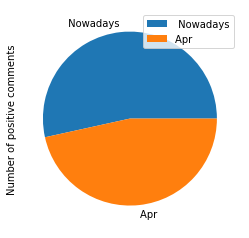

In [9]:
np_df = pd.DataFrame({ 'Time' : time , 'Number of positive comments': list_pos})
np_df.plot.pie(labels = time ,  y = 'Number of positive comments')

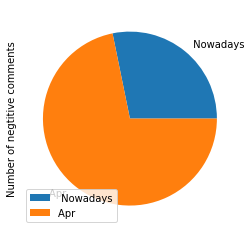

In [5]:
neg_df = pd.DataFrame({ 'Time' : time , 'Number of negtitive comments': list_neg})
neg_df.plot.pie(labels = time ,  y = 'Number of negtitive comments')

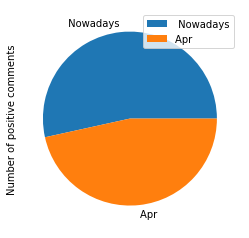

In [6]:
pos_df = pd.DataFrame({ 'Time' : time , 'Number of positive comments': list_pos})
pos_df.plot.pie(labels = time ,  y = 'Number of positive comments')

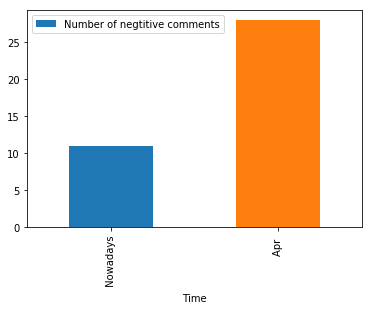

In [7]:
neg_df = pd.DataFrame({ 'Time' : time , 'Number of negtitive comments': list_neg})
neg_df.plot.bar(x = 'Time', y = 'Number of negtitive comments')

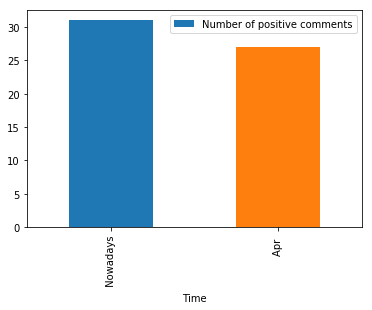

In [8]:
pos_df = pd.DataFrame({ 'Time' : time , 'Number of positive comments': list_pos})
pos_df.plot.bar(x = 'Time', y = 'Number of positive comments')